In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle competitions download -c cifar-10

... resuming from 249561088 bytes (500585560 bytes left) ...
100% 714M/715M [00:22<00:00, 24.3MB/s]
100% 715M/715M [00:22<00:00, 22.5MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 97.9 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['4642.png', '3283.png', '42189.png', '27799.png', '33843.png']
['38087.png', '3959.png', '34767.png', '42419.png', '20045.png']


In [15]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [19]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [20]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

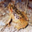

In [21]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [22]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [23]:
id_list = list(labels_df['id'])

In [24]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [25]:
type(data)

list

In [26]:
len(data)

50000

In [27]:
type(data[0])

numpy.ndarray

In [28]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
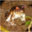

In [29]:
data[0]

In [30]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [37]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9575 - acc: 0.2854 - val_loss: 1.8858 - val_acc: 0.3198
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.8449 - acc: 0.3324 - val_loss: 1.8669 - val_acc: 0.3212
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8058 - acc: 0.3467 - val_loss: 1.7860 - val_acc: 0.3540
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.7853 - acc: 0.3565 - val_loss: 1.7430 - val_acc: 0.3650
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.7686 - acc: 0.3636 - val_loss: 1.7499 - val_acc: 0.3610
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.7418 - acc: 0.3733 - val_loss: 1.7343 - val_acc: 0.3713
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.7275 - acc: 0.3822 - val_loss: 1.7118 - val_acc: 0.3770
Epoch 8/10
1125/1125 [==============================] - 3s 2ms

In [39]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [40]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [41]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [44]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [45]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 458s 380ms/step - loss: 1.6375 - acc: 0.4601 - val_loss: 0.9395 - val_acc: 0.7475
Epoch 2/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.9667 - acc: 0.7178 - val_loss: 0.4647 - val_acc: 0.8935
Epoch 3/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.7134 - acc: 0.8174 - val_loss: 0.3355 - val_acc: 0.9190
Epoch 4/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.5405 - acc: 0.8754 - val_loss: 0.2855 - val_acc: 0.9265
Epoch 5/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.4254 - acc: 0.9125 - val_loss: 0.2575 - val_acc: 0.9310
Epoch 6/10
1125/1125 [==============================] - 428s 380ms/step - loss: 0.3344 - acc: 0.9392 - val_loss: 0.2303 - val_acc: 0.9395
Epoch 7/10
1125/1125 [==============================] - 427s 380ms/step - loss: 0.2712 - acc: 0.9554 - val_loss: 0.2185 - val_acc: 0.9383
Epoch 8/10
1125/1125 [============

In [46]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 115ms/step - loss: 0.2439 - acc: 0.9339
Test Accuracy = 0.933899998664856


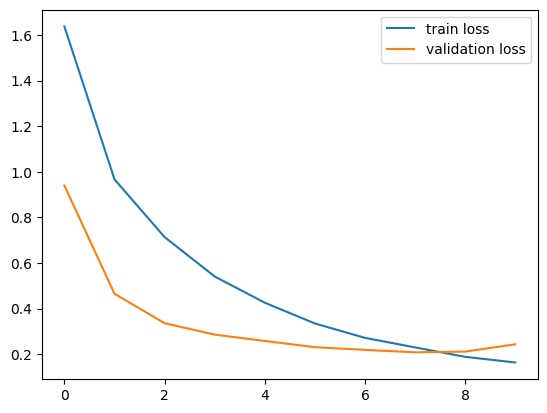

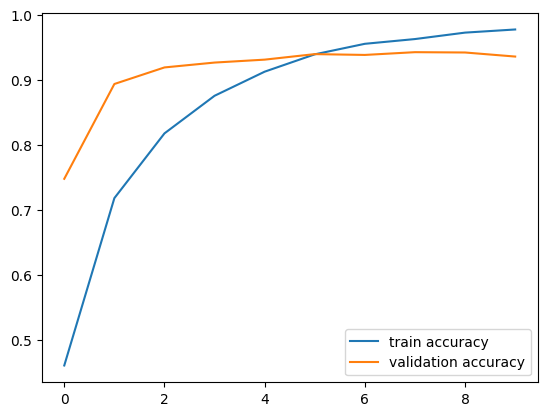

In [47]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()